#### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Please Note**: The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.

https://www.kaggle.com/hellbuoy/car-price-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import r2_score
import seaborn as sns

**Q-00.** Read the file `CarPrice_Assignment.csv` into a DataFrame:

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
print(df.shape)
df.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Data Dictionary
1. `Car_ID`:	Unique id of each observation (Interger)
2.	`Symboling`: 	Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
3.	`carName`:	Name of car company (Categorical)
4.	`fueltype`:	Car fuel type i.e gas or diesel (Categorical)
5.	`aspiration`:	Aspiration used in a car (Categorical)
6.	`doornumber`:	Number of doors in a car (Categorical)
7.	`carbody`:	body of car (Categorical)
8.	`drivewheel`:	type of drive wheel (Categorical)
9.	`enginelocation`:	Location of car engine (Categorical)
10.	`wheelbase`:	Weelbase of car (Numeric)
11.	`carlength`:	Length of car (Numeric)
12.	`carwidth`:	Width of car (Numeric)
13.	`carheight`:	height of car (Numeric)
14.	`curbweight`:	The weight of a car without occupants or baggage. (Numeric)
15.	`enginetype`:	Type of engine. (Categorical)
16.	`cylindernumber`:	cylinder placed in the car (Categorical)
17.	`enginesize`:	Size of car (Numeric)
18.	`fuelsystem`:	Fuel system of car (Categorical)
19.	`boreratio`:	Boreratio of car (Numeric)
20.	`stroke`:	Stroke or volume inside the engine (Numeric)
21.	`compressionratio`:	compression ratio of car (Numeric)
22.	`horsepower`:	Horsepower (Numeric)
23.	`peakrpm`:	car peak rpm (Numeric)
24.	`citympg`:	Mileage in city (Numeric)
25.	`highwaympg`:	Mileage on highway (Numeric)
26.	`price`: **(Dependent variable)**	Price of car (Numeric)

**Source**: https://archive.ics.uci.edu/ml/datasets/Automobile

Let us find the distinct values of the car name:

In [4]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Question/Task: Clean the car name column by spliting it and keeping the first word (company name). What are the unique company car names?


In [5]:
df["CarName"]=df["CarName"].apply(lambda x: x.split(" ")[0])

In [6]:
df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Good! we drastically reduced the number of distinct names.

However, we can see some duplicate values in car name:
* nissan and Nissan are same
* toyota and toyouta are same
* vokswagen , volkswagen and vw are same
* mazda and maxda are same
* porcshce and porsche are same

So, let us correct the misspelled names:

In [7]:
corrections = {'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche',
        'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}
df['CarName'] = df['CarName'].replace(corrections)
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Question/Task: Identify all columns with ordinal, nominal, and numeric values and write them as arrays. For guidance, see the example below:

In [8]:
binary_cols  = ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
ordinal_cols = ['symboling','cylindernumber']
nominal_cols = ['carbody','drivewheel','enginetype','fuelsystem']
numeric_cols = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke","compressionratio", "horsepower","peakrpm","citympg","highwaympg"]

### Prediction with One Feature

Question/Task: Create a scatter plot for "horsepower" and "price". Describe what you observe.

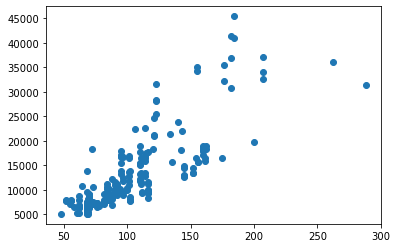

In [9]:
plt.scatter(df["horsepower"], df["price"] )

We now want to create a Linear Regression to make hoursepower predictions based on the price.

In [10]:
X=df[["horsepower"]]

In [11]:
y=df["price"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(164, 1) (41, 1) (164,) (41,)


Now we can use the LinearRegression method to create and train a model based on our data.

In [14]:
clf = LinearRegression()

Question/Task: Train your Linear Regression model "clf" with your training data and print the coefficient of determination (R^2) as trainings score.





In [15]:
clf.fit(X_train, y_train)

LinearRegression()

In [16]:
clf.score(X_train, y_train)

0.6442722805856911

In [17]:
y_pred=clf.predict(X_test)

Question/Task: Calculate again the coefficient of determination as test score and compare it to the trainings score. What can you observe?

In [18]:
clf.score(X_test, y_test)

0.6751817601966934

In [19]:
print(r2_score(y_test, y_pred))

0.6751817601966934


Visualisations help us to better understand our model. Using a scatter plot, we print our model as a red line with our "horsepower" and "price" data sets.

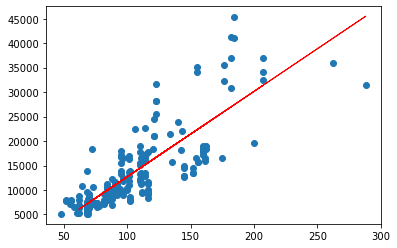

In [20]:
plt.scatter(df[['horsepower']], df['price'])
plt.plot(X_test["horsepower"], y_pred, color="red", linewidth=1)
plt.show()

Question/Task: What can you observe?

### Prediction with All Numerical Feature

#### Numerical features

Until now, we only looked at "hoursepower" and "price". However, "hoursepower" might not be the best variable to predict the price of cars. To get a better understanding of our distribution we use the scatterplot once more and display all variables in relation to our target variable "price". In additional, have a look at the correlations between our target variable "price" and our features.

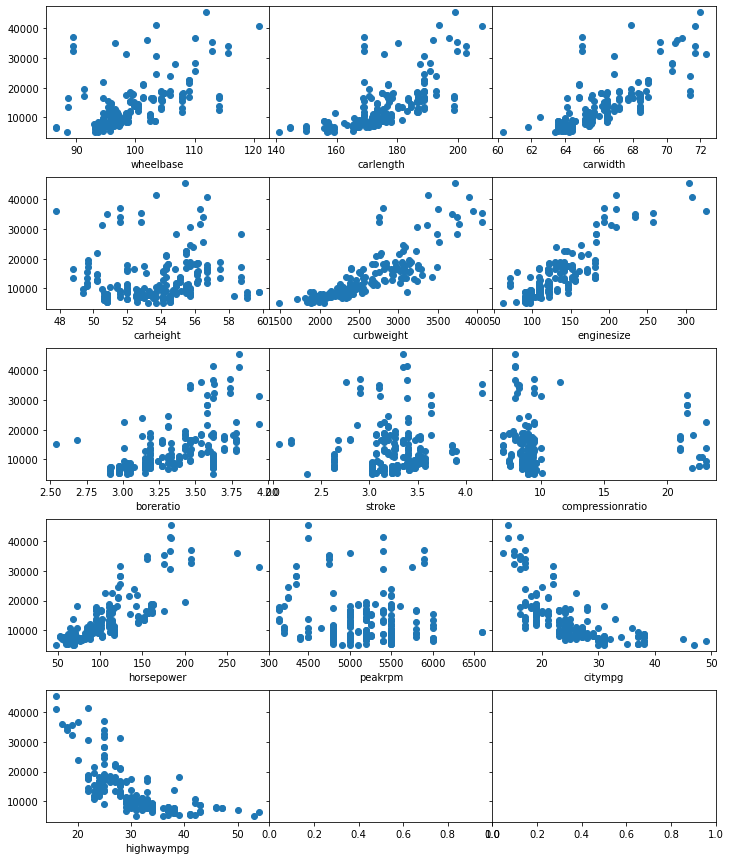

In [24]:
fig, axs = plt.subplots(5, 3, figsize=(12,15), sharey='all')

for i in range(5):
    for j in range(3):
        k = 3*i+j
        ax = axs[i, j]
        if k>=13: continue
        feat = numeric_cols[k]
      
        ax.scatter(df[feat], df['price'])
        ax.set_xlabel(feat)
plt.subplots_adjust(wspace=0, hspace=.3)        

In [21]:
for c in numeric_cols:
    cor = np.corrcoef(df[c], df['price'])[0][1]
    print(c, cor)

wheelbase 0.5778155982921501
carlength 0.6829200156779625
carwidth 0.7593252997415114
carheight 0.11933622657049447
curbweight 0.8353048793372965
enginesize 0.8741448025245119
boreratio 0.5531732367984437
stroke 0.079443083881931
compressionratio 0.06798350579944264
horsepower 0.8081388225362217
peakrpm -0.08526715027785686
citympg -0.68575133602704
highwaympg -0.6975990916465568


Question/Task: What can you observe? Which variables would be in your opinion good to predict the car price and why?

# from my observation, the size of the car affect the price more than any variable as it has the strongest correlation


# the varaibles with positive correlation used be used to predict  the car price. but even though some of the variable have negative correlation , all the variables should be used to train the model

In [22]:
X=df[["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke","compressionratio", "horsepower","peakrpm","citympg","highwaympg"]]

In [23]:
y=df["price"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(164, 13) (41, 13) (164,) (41,)


In [26]:
clf = LinearRegression()

Question/Task: Train your linear regression model and calculate the trainings score as before.

In [27]:
clf.fit(X_train, y_train)

LinearRegression()

In [28]:
clf.score(X_train, y_train)

0.8455123586456692

Question/Task: Now, using X_test, predict the corresponding car prices using your freshly trained model. Afterwards calculate the R^2 test score. 

In [29]:
y_pred=clf.predict(X_test)

In [30]:
clf.score(X_test, y_test)

0.8607498331183712

In [31]:
print(r2_score(y_test,y_pred))

0.8607498331183712


Question/Task: Is the trainings score different to the one we had using just "hoursepower" as variable? And if there is, what do you think the reason is?

### Prediction with All Features

#### Binary features

In [32]:
print(binary_cols)

['fueltype', 'aspiration', 'doornumber', 'enginelocation']


In [33]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [34]:
df['fueltype'] = df['fueltype'].map({'gas':0, 'diesel':1})

In [35]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [36]:
df['aspiration'] = df['aspiration'].map({'std':0, 'turbo':1})

Analogously, encode the respective binary features for ['doornumber', 'enginelocation']

In [37]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [38]:
df['doornumber'] =df['doornumber'].map({"four": 0, "two": 1}) 

In [39]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [40]:
df['enginelocation'] =df['enginelocation'].map({"front" : 0, "rear": 1}) 

#### Ordinal Features

For the ordinal features, we need to map string values to numerical features for the *cylindernumber*, *symboling* is already in numerical format.

In [41]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [42]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [43]:
dic = {'four':4, 'six':6, 'five':5, 'eight':8, 'two':2, 'three':3, 'twelve': 12}
df['cylindernumber'] = df['cylindernumber'].replace(dic)

#### Preparing Data Set

Before, we differentiated between the different data types. To train a model based on all features, we have to prepare the data.

In [44]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [45]:
df_CB = pd.get_dummies(df['carbody'], prefix='carbody')
df_CB.head()

,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [46]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In the column "drivewheel" we have categorical values. However, we can only build a linear regression model with numerical values. To convert categorical values into numerical values we can use the pandas method "get_dummies".

In [47]:
df_DW = pd.get_dummies(df['drivewheel'], prefix='drivewheel')
df_DW.head()

,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [48]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

The same we do for the "enginetype" column.

In [49]:
df_ET = pd.get_dummies(df['enginetype'], prefix='enginetype')
df_ET.head()

,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [50]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [51]:
df_FS = pd.get_dummies(df['fuelsystem'], prefix='fuelsystem')
df_FS.head()

,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


We now combine these new tables into one data frame.

In [52]:
df2 = pd.concat([df_CB, df_DW, df_ET, df_FS], axis=1)
df2.shape

(205, 23)

In [53]:
df2.columns

Index(['carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [54]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [55]:
df3 = pd.concat([df, df2], axis=1)
df3 = df3.drop(columns=['carbody','drivewheel','enginetype','fuelsystem'])
print(df3.shape)
df3.head()

(205, 45)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero,0,0,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,0,0,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,0,0,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi,0,0,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,0,0,0,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [56]:
df3.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [57]:
model = binary_cols + ordinal_cols + numeric_cols + list(df2.columns)
print(len(model))
print(model)

42
['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'symboling', 'cylindernumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']


Question/Task: Create a X_train, X_test, y_train, and y_test data set and print their shapes. 

Note: Test size can be again 0.2.

In [58]:
from sklearn.linear_model import Lasso

In [59]:
X = df3[model]
y = df3['price']
X = MinMaxScaler().fit_transform(X)

In [60]:
clf = Lasso()

Question/Task: Train the model and calcualte the R^2 trainings score.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [62]:
clf.fit(X_train, y_train)

Lasso()

In [63]:
clf.score(X_train, y_train)

0.93006285798322

Question/Task: Now create predictions using the new model and calculate the R^2 test score. Is there a difference to the previous test scores? What could be a reason for your result?

In [64]:
y_pred=clf.predict(X_test)

In [65]:
print(r2_score(y_test, y_pred))

0.8475092345652351


https://www.kaggle.com/songulerdem/car-price-prediction-with-pycaret